# **HOME LOAN APPROVAL PREDICTION**

In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv('/content/Training Dataset.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural    

In [ ]:
# Check the number of rows and columns
df.shape

(614, 13)

In [ ]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Display basic Calculations

print("\nBasic Calculations of the dataset:")

print(df.describe())


Basic Calculations of the dataset:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
# Check the data for having Null values
df.isnull().sum()/ df.shape[0]*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
# Dropping the rows with null values
df = df.dropna(subset= ['Gender', 'Married', 'Dependents', 'Self_Employed'])


In [ ]:
# Check the data for having Null values
df.isnull().sum()/ df.shape[0]*100

,0
Loan_ID,0.000000
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.429603
Loan_Amount_Term,2.166065


In [ ]:
# Remove specific categorical columns

df_no_categorical = df.drop(columns=['Gender', 'Married'])

print("Remove categorical columns:\n", df_no_categorical)

Remove categorical columns:
       Loan_ID Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001002          0      Graduate            No             5849   
1    LP001003          1      Graduate            No             4583   
2    LP001005          0      Graduate           Yes             3000   
3    LP001006          0  Not Graduate            No             2583   
4    LP001008          0      Graduate            No             6000   
..        ...        ...           ...           ...              ...   
609  LP002978          0      Graduate            No             2900   
610  LP002979         3+      Graduate            No             4106   
611  LP002983          1      Graduate            No             8072   
612  LP002984          2      Graduate            No             7583   
613  LP002990          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0

In [ ]:
# Filling the na values mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
print("replacing null values with mean:\n", df)

replacing null values with mean:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [ ]:
# Filling the na values of Loan_Amount_Term with mode
df.fillna({'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0]}, inplace=True)

In [ ]:
# Printing the numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('Loan_Amount_Term')
num_cols.remove('Credit_History')
print(num_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


## **Data Exploration and Analysis**

### **Univariate Analysis**


**Histogram of Applicant Income, Coapplicant Income, Loan Amount**

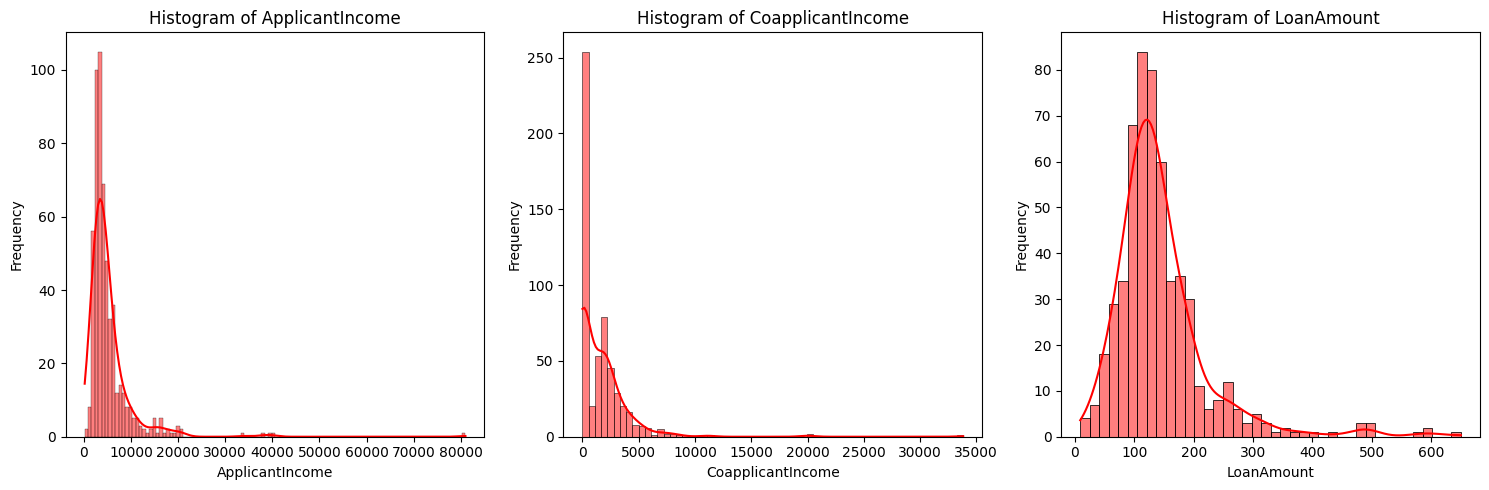

In [ ]:
# List of numeric columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the numeric columns and create subplots
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)  # Create a grid of 1 row and len(num_cols) columns
    sns.histplot(data=df, x=col, kde=True, color="red")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show all histograms in one figure
plt.show()


**Insight :** The histograms show most applicants have lower incomes and smaller loan requests, with few high-income applicants seeking larger loans.

**Box plot and voilin plot of LaonAmount by Status**

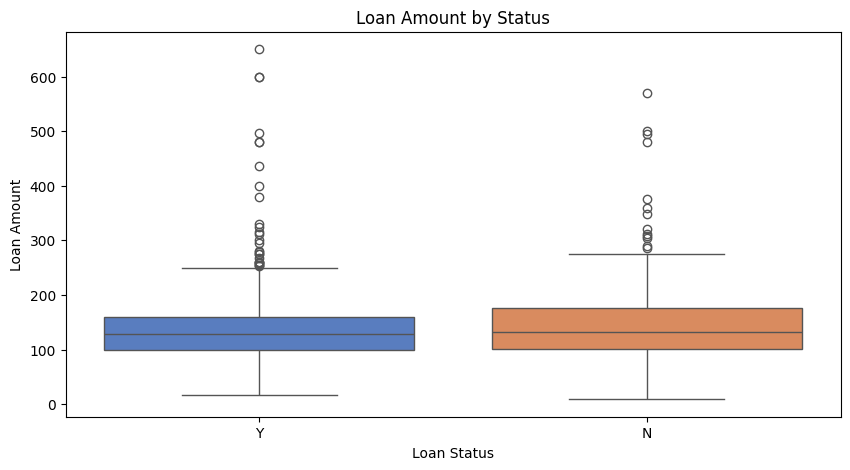

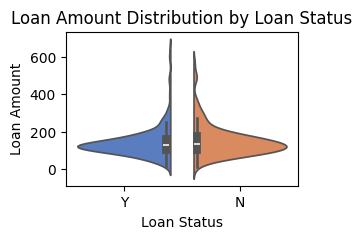

In [ ]:
# Set plot size (smaller size for compactness)
plt.figure(figsize=(10, 5))

# Create a boxplot for LoanAmount by Loan_Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='muted')
plt.title('Loan Amount by Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()

# Violin plot for LoanAmount by Loan_Status
plt.figure(figsize=(3, 2))
sns.violinplot(x='Loan_Status', y='LoanAmount', data=df, palette='muted', split=True)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()


**Insight**:
The median loan amounts and variability are similar for both approved (Y) and rejected (N) loans, but approved loans have more extreme outliers, indicating occasional approvals of very high loan amounts. Loan rejection doesn’t strongly correlate with loan size based on this data.


**Pie chart analysis for Education by Loan status**

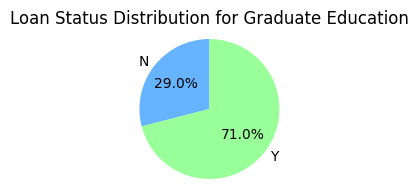

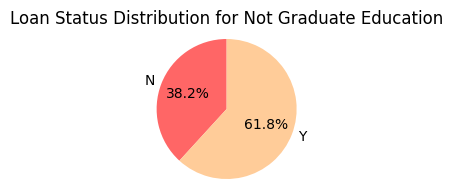

In [ ]:
# Group the data by Education and Loan_Status to get the count
education_loan_status = df.groupby(['Education', 'Loan_Status']).size().reset_index(name='Count')

# Set plot size
plt.figure(figsize=(3, 2))

# Create a pie chart for Education vs Loan_Status (with Education as the categories)
# Plot for Graduate category
graduate_data = education_loan_status[education_loan_status['Education'] == 'Graduate']

plt.pie(graduate_data['Count'], labels=graduate_data['Loan_Status'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Loan Status Distribution for Graduate Education')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Plot for Not Graduate category
plt.figure(figsize=(3, 2))
not_graduate_data = education_loan_status[education_loan_status['Education'] == 'Not Graduate']

plt.pie(not_graduate_data['Count'], labels=not_graduate_data['Loan_Status'], autopct='%1.1f%%', startangle=90, colors=['#ff6666','#ffcc99'])
plt.title('Loan Status Distribution for Not Graduate Education')
plt.axis('equal')

plt.show()


**Insight** : There is not much impact on loan status for Graduate category. Since, the employement status is typically not solely dependent on education, other factors would include.

**KDE Plot of Applicant Income by Loan Status**

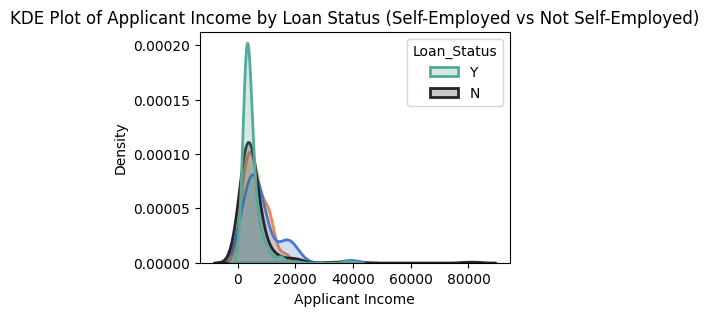

In [ ]:

# Set plot size
plt.figure(figsize=(4, 3))

# Create a KDE plot for ApplicantIncome by Loan_Status, split by Self_Employed status
sns.kdeplot(data=df[df['Self_Employed'] == 'Yes'], x='ApplicantIncome', hue='Loan_Status', fill=True, common_norm=False, palette='muted', linewidth=2)
sns.kdeplot(data=df[df['Self_Employed'] == 'No'], x='ApplicantIncome', hue='Loan_Status', fill=True, common_norm=False, palette='dark:#5A9_r', linewidth=2)

# Add title and labels
plt.title('KDE Plot of Applicant Income by Loan Status (Self-Employed vs Not Self-Employed)')
plt.xlabel('Applicant Income')
plt.ylabel('Density')

# Show the plot
plt.show()


**Insight:** This univariate analysis shows that applicant income has some influence on loan approval, with higher incomes being more positively associated with approvals. However, the impact is modest, and further multivariate analysis is required to understand the role of other variables (e.g., credit score, loan amount, employment type)

**Box plot of Coapplicant Income by Loan Status**

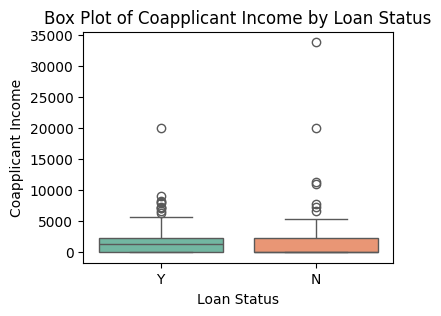

In [ ]:
# Set plot size
plt.figure(figsize=(4, 3))

# Create the box plot
sns.boxplot(data=df, x='Loan_Status', y='CoapplicantIncome', palette='Set2')

# Add title and labels
plt.title('Box Plot of Coapplicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')

# Show the plot
plt.show()


**Insight:** The Coapplicant's Income influence is modest. Yet we can have an insight of the income which has higher density around certain group of income, who is apporved.

**Bar chart of Loan Status by Credit History**

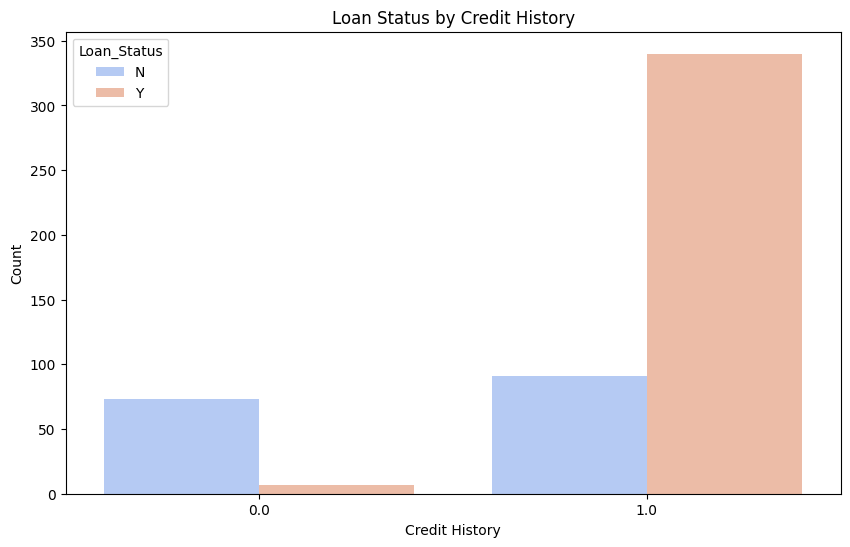

In [ ]:

# Set plot size
plt.figure(figsize=(10, 6))

# Create a countplot for Credit_History by Loan_Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='coolwarm')

# Add title and labels
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')

# Show the plot
plt.show()


**Insight**: If the credit history is 0 there is almost 0 chances to get a Loan approval. Credit history makes a turning point in the Loan-status. It's one of the most important entity to be considered.

**Pie Chart of Loan Status by Property Area**

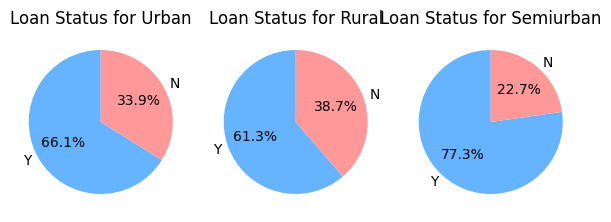

In [ ]:
# Set up the plot size and layout
plt.figure(figsize=(6, 4))

# Loop through each unique Property_Area and create a pie chart for Loan_Status
for i, area in enumerate(df['Property_Area'].unique()):
    plt.subplot(1, len(df['Property_Area'].unique()), i+1)  # Create subplots for each Property_Area
    area_data = df[df['Property_Area'] == area]['Loan_Status'].value_counts()  # Count loan statuses in this area
    area_data.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90, legend=False)
    plt.title(f'Loan Status for {area}')
    plt.ylabel('')  # Hide the ylabel for aesthetics

# Display the pie charts
plt.tight_layout()
plt.show()


**Insight:** The Loan Status is dependent on the Property Area where the rural area has high chances of getting rejected.Semiurban areas might represent emerging economies, with improving infrastructure, businesses, and financial literacy. Approval rates may still be high but could be slightly lower than Semiurban due to higher loan requests, stricter screening, or higher default risks. Denial rates might dominate due to lower income stability or lack of collateral.

**KDE Plot of Loan Status by Self Employed**

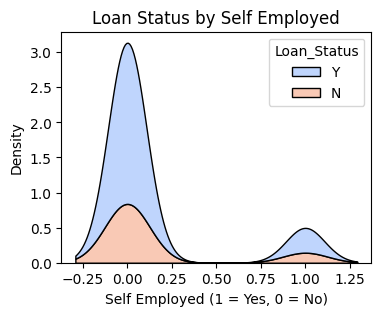

In [ ]:
# Convert 'Self_Employed' to a binary numeric variable (Yes = 1, No = 0)
df['Self_Employed_numeric'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(4,3))

# Create a KDE plot for Self_Employed by Loan_Status
sns.kdeplot(data=df, x='Self_Employed_numeric', hue='Loan_Status', multiple="stack", palette="coolwarm")

plt.title('Loan Status by Self Employed')
plt.xlabel('Self Employed (1 = Yes, 0 = No)')
plt.ylabel('Density')
plt.show()


**Insight:** The Loan Status is influenced by Self Employement as there is low risk of repaying the amount. One of the important factors in deceiding the the loan approval.

**Bar chart of Loan status by Marital Status**

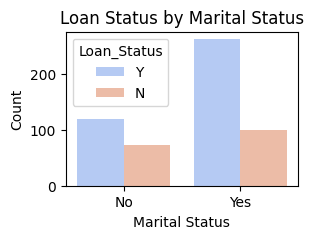

In [ ]:
plt.figure(figsize=(3, 2))

# Create a bar plot for Married by Loan_Status
sns.countplot(data=df, x='Married', hue='Loan_Status', palette='coolwarm')

# Add title and labels
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


**Insight:** If the Loan applicants are married the approval rate is higher than compared to the nonmarried applicants. May be lenders find more financial responsibility for married.

**Histogram of Loan Status by Number of Dependents**

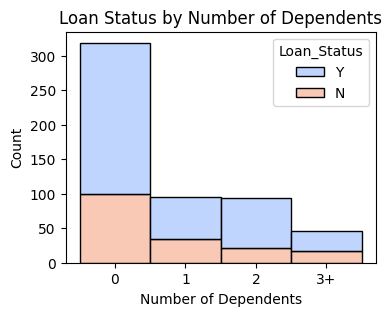

In [ ]:

# Set plot size
plt.figure(figsize=(4, 3))

# Create a histogram for Dependents by Loan_Status
sns.histplot(data=df, x='Dependents', hue='Loan_Status', multiple='stack', palette='coolwarm', discrete=True)

# Add title and labels
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')

# Show the plot
plt.show()


**Insight:** The Loan Ststus is highly influenced by the No.of dedpendents. If there are no dependents the chances of getting approved is pretty high compared to 1,2,3+ dependecies.

**Pie chart of Loan status by Loan Amount Term**

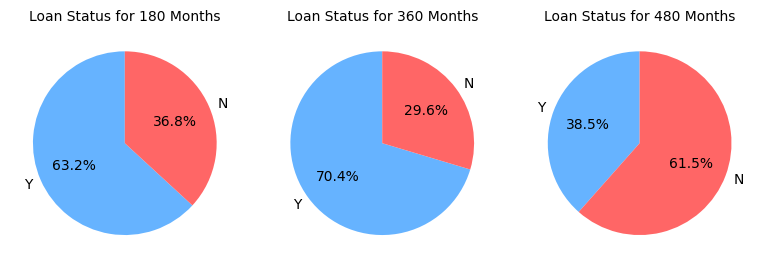

In [ ]:
# Define specific loan terms to visualize
top_loan_terms = [180, 360, 480]

# Set up the plot with multiple rows and columns, with a smaller figure size and tight spacing
fig, axes = plt.subplots(nrows=1, ncols=len(top_loan_terms), figsize=(8, 4))

# If there's only one loan term, make axes a list
if len(top_loan_terms) == 1:
    axes = [axes]

# Loop through each specific loan term and create a pie chart
for ax, term in zip(axes, top_loan_terms):
    # Filter data for the current loan term
    loan_term_data = df[df['Loan_Amount_Term'] == term]

    # Count loan status for the current loan term and ensure consistent order of labels
    loan_status_counts = loan_term_data['Loan_Status'].value_counts()
    loan_status_counts = loan_status_counts.reindex(['Y', 'N'], fill_value=0)  # Ensure consistent order

    # Create a pie chart for the loan status distribution within the current loan term
    ax.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
    ax.set_title(f'Loan Status for {term} Months', fontsize=10)  # Smaller font size for title

# Improve layout for even smaller figures
plt.tight_layout(pad=2.0)  # Reduce padding between pie charts
plt.show()


**Insight:**  Shorter terms (e.g., 180 months) reduce total interest costs for borrowers but require higher monthly repayments.
Longer terms (e.g., 360 months) increase affordability but result in higher overall interest costs.
 The 480-month term has the lowest approval rates, Lenders perceive longer terms as riskier because of the extended uncertainty around borrower stability and income over time.


### **BIVARIATE ANALYSIS**

**Scatter Plot of Applicant Income vs. Loan Amount**

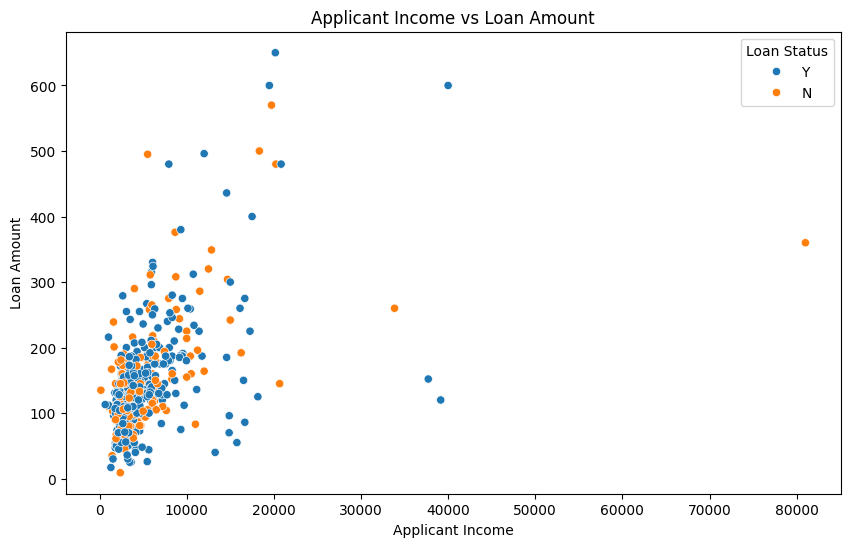

In [ ]:
# Plotting scatter plot for ApplicantIncome vs LoanAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()


**Insight:** Higher income generally correlates with larger loan amounts, but approvals are influenced by other factors. Most loans are small, targeted at incomes under 20,000, with notable rejections for larger loans.

This suggest that other factors beyond just income influence the bank's loan approval decisions.

**Scatter Plot of Applicant and Coapplicant Income vs. Loan Amount**

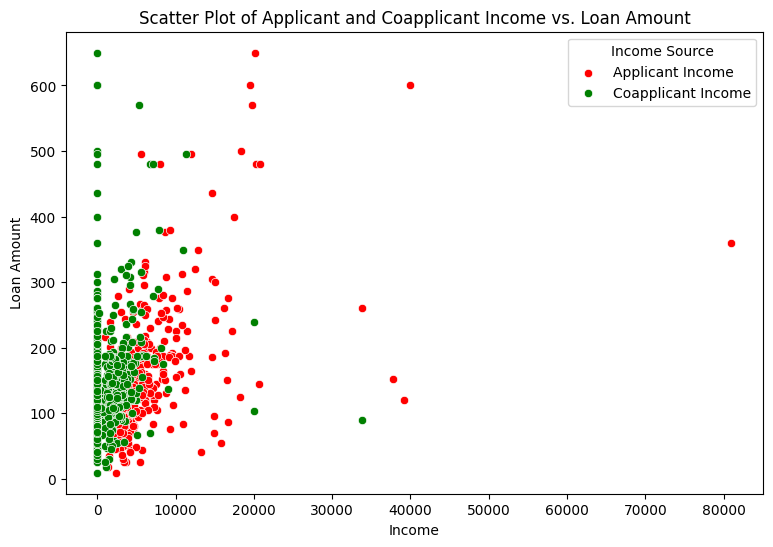

In [ ]:
plt.figure(figsize=(9, 6))

# Scatter plot for Applicant Income vs Loan Amount
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', color='red', label='Applicant Income')

# Scatter plot for Coapplicant Income vs Loan Amount
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount', color='green', label='Coapplicant Income')

# Adding plot details
plt.title('Scatter Plot of Applicant and Coapplicant Income vs. Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(title='Income Source')
plt.show()



**Insight :**  The scatter plot suggests that higher incomes, both for applicants and coapplicants, are associated with larger loan approvals. However, while income is an important factor, most loans are still concentrated in the lower income and loan amount ranges.

**Box Plot for Loan Amount by Credit History**

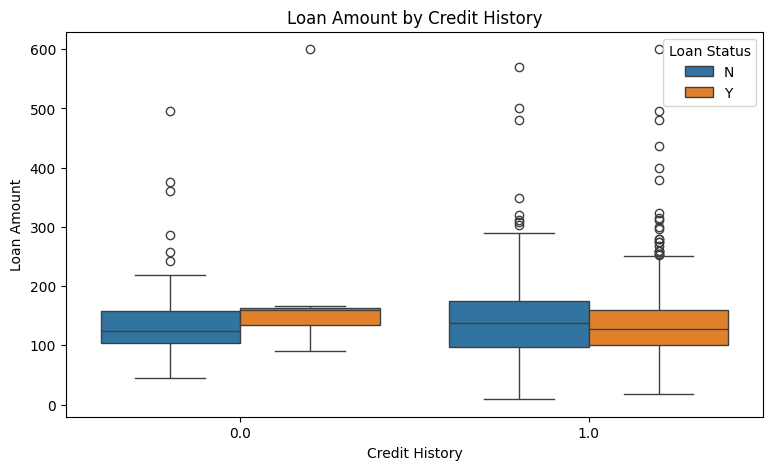

In [ ]:
# Plotting boxplot for credit_History vs LoanAmount
plt.figure(figsize=(9, 5))
sns.boxplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=df, palette='tab10')
plt.title('Loan Amount by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

**Insight:**  The boxplot shows that applicants with a good credit history (1.0) tend to have a slightly higher median loan amount than those with poor credit history (0.0).
This suggest that credit history isn't the only factor in loan amount decisions.

**Bar Plot for Loan Amount by Education**


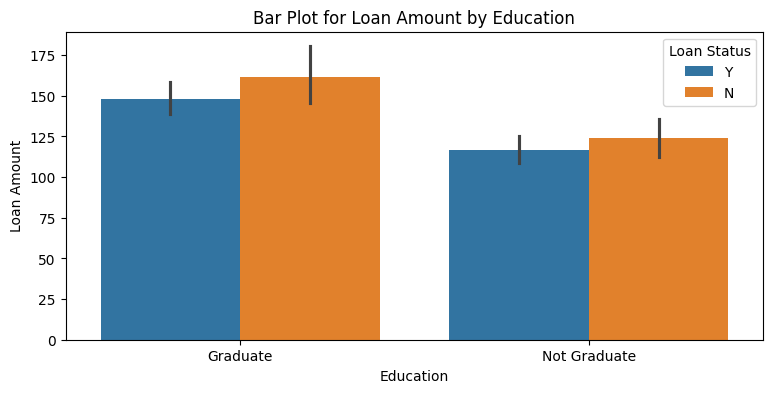

In [ ]:
# Plotting barplot for Education vs LoanAmount
plt.figure(figsize=(9, 4))
sns.barplot(x='Education', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Bar Plot for Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()


**Insight:**  Graduate applicants  tend to receive larger loan amounts and have higher approval rates, likely due to being seen as lower-risk borrowers

**Violin Plot: Applicant Income by Self Employed Status**


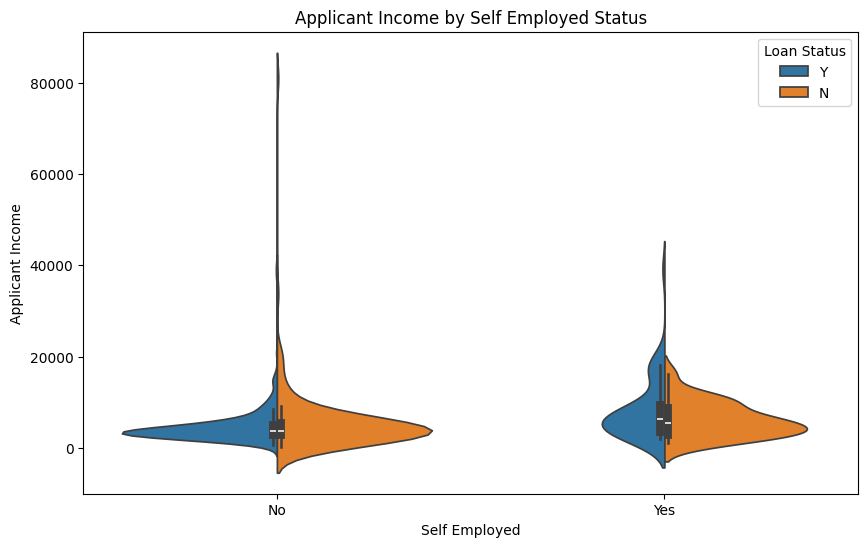

In [ ]:
# Plotting violinplot for Self_Employed vs ApplicantIncome
plt.figure(figsize=(10, 6))
sns.violinplot(x='Self_Employed', y='ApplicantIncome', hue='Loan_Status', data=df, split=True)
plt.title('Applicant Income by Self Employed Status')
plt.xlabel('Self Employed')
plt.ylabel('Applicant Income')
plt.legend(title='Loan Status')
plt.show()

**Insight:** Non-self-employed applicants have higher loan approval rates across various income levels, while self-employed applicants show fewer approvals.

**KDE Plot: Coapplicant Income by Loan Status**


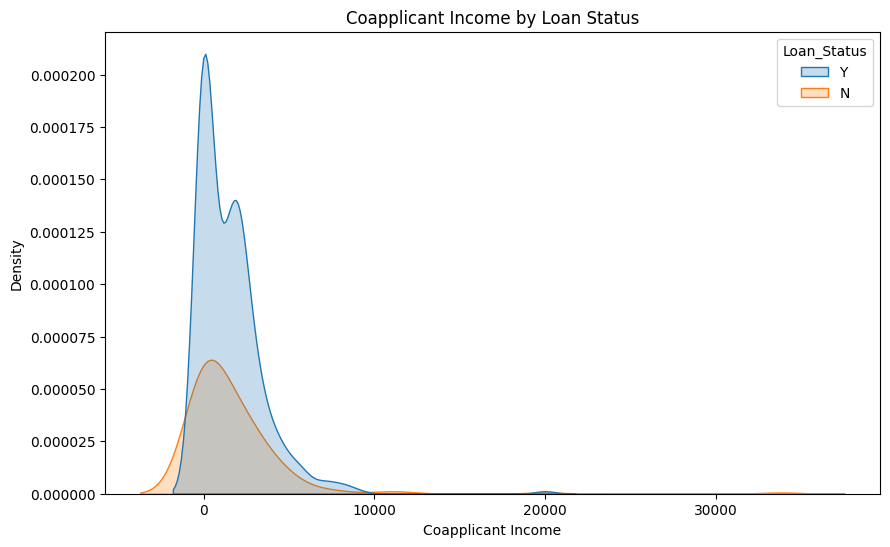

In [ ]:
# Plotting kdeplot for Coapplicant Income by Loan Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CoapplicantIncome', hue='Loan_Status', fill=True)
plt.title('Coapplicant Income by Loan Status')
plt.xlabel('Coapplicant Income')
plt.show()


**Insight:** Approved coapplicants have higher incomes compared to rejected coapplicants.

**Box Plot for Loan Amount by Gender**



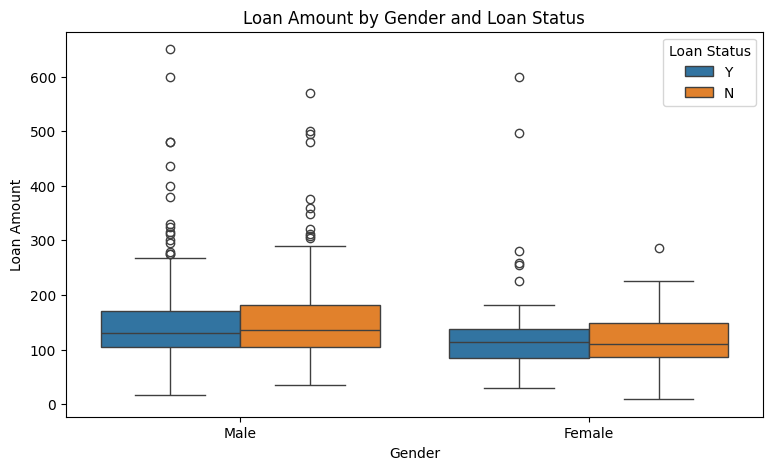

In [ ]:
# Plotting boxplot for LoanAmount on Gender and LoanStatus
plt.figure(figsize=(9, 5))
sns.boxplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount by Gender and Loan Status')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

**Insight:** Male applicants tend to have higher loan amounts compared to female applicants

**Box plot for Loan Amount by Education and Loan Status**


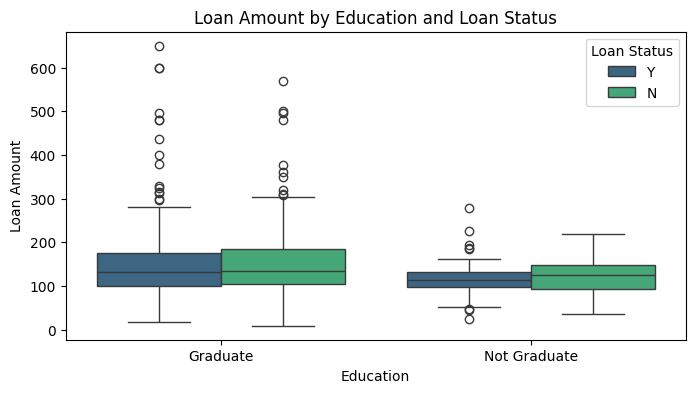

In [ ]:
# Plotting boxplot of LoanAmount on Education and Loan Status
plt.figure(figsize=(8, 4))
sns.boxplot(x='Education', y='LoanAmount', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Amount by Education and Loan Status')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()



**Insight:** The difference in loan amounts between approved and rejected applicants is larger for graduate-level education compared to non-graduate

**Box Plot of Loan Amount by Credit History**



**Insight:**  Applicants with a credit history of 1.0 tend to have higher loan amounts compared to those with a credit history of 0.0

**Box Plot of Loan Amount by Property Area**


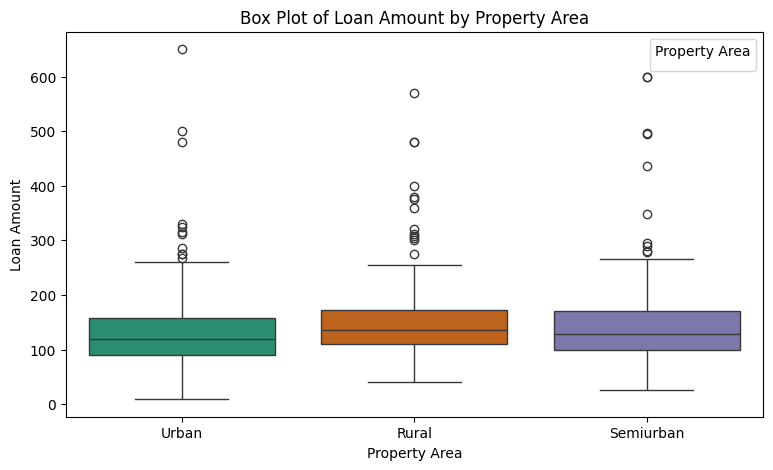

In [ ]:
# Plotting boxplot of LoanAmount with PropertyArea
plt.figure(figsize=(9, 5))
sns.boxplot(x='Property_Area', y='LoanAmount', hue='Property_Area', data=df, palette='Dark2')
plt.title('Box Plot of Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.legend(title='Property Area')
plt.show()



**Insight:** Rural areas generally have the largest average loan amounts, while Semiurban areas display the most variation in loan sizes, and Urban areas have the most consistent, smaller loan amounts.

### **MULTIVARIATE ANALYSIS**

**3D Scatter Plot for of Applicant Income, Coapplicant Income, and Loan Amount**


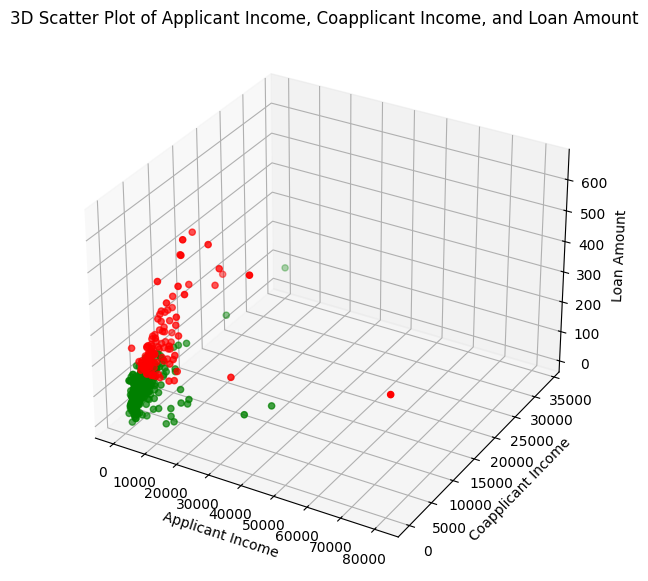

In [ ]:
# Corrected figure size
fig = plt.figure(figsize=(15, 7))  # Specify both width and height
ax = fig.add_subplot(111, projection='3d')

# Condition to differentiate colors
colors = ['r' if loan > 180 else 'g' for loan in df['LoanAmount']]

# Scatter plot with different colors
ax.scatter(df['ApplicantIncome'], df['CoapplicantIncome'], df['LoanAmount'], c=colors, marker='o')

# Labels and title
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Coapplicant Income')
ax.set_zlabel('Loan Amount')
ax.set_title('3D Scatter Plot of Applicant Income, Coapplicant Income, and Loan Amount')
plt.show()



**Insight:** For both graduate and non-graduate education levels, self-employed applicants tend to have lower loan amounts compared to non-self-employed applicants at similar income levels.

**FacetGrid: Education and Self Employed with Loan Amount**


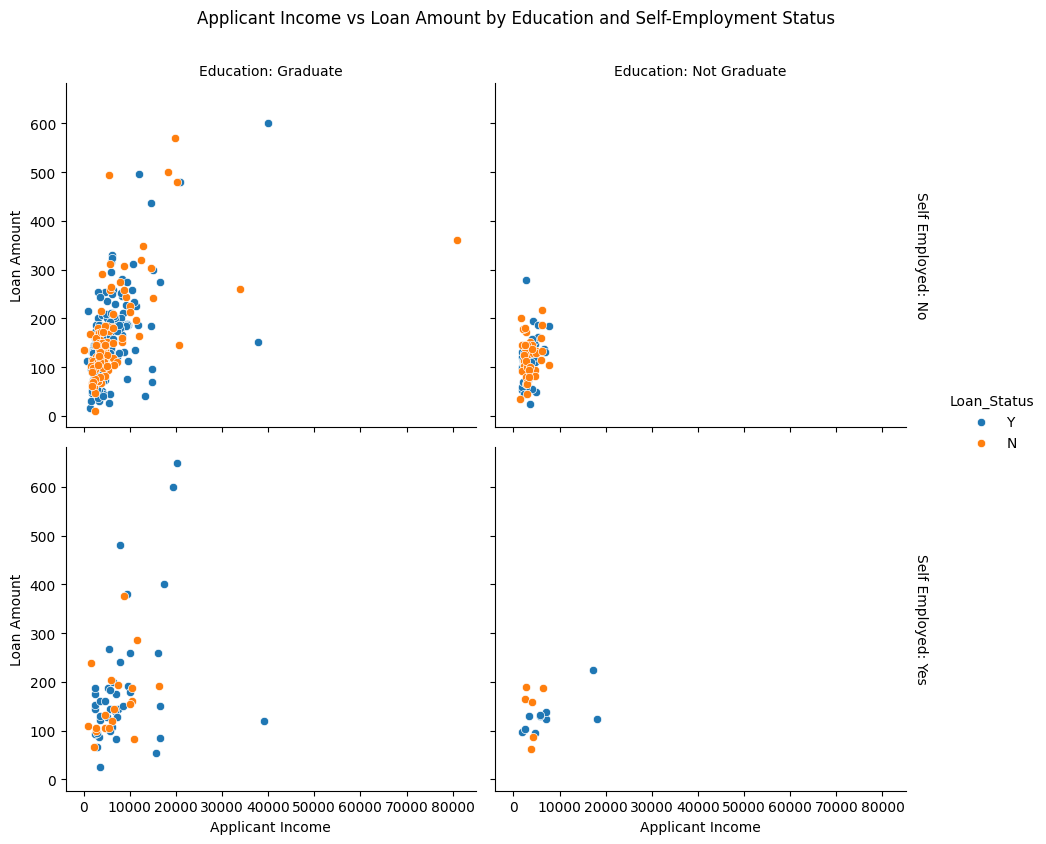

In [ ]:
# Plotting FacetGrid for various features
g = sns.FacetGrid(df, col='Education', row='Self_Employed', hue='Loan_Status', margin_titles=True, height=4, aspect=1.2)
g.map(sns.scatterplot, 'ApplicantIncome', 'LoanAmount')
g.add_legend()
g.set_axis_labels('Applicant Income', 'Loan Amount')
g.set_titles(col_template='Education: {col_name}', row_template='Self Employed: {row_name}')
plt.suptitle('Applicant Income vs Loan Amount by Education and Self-Employment Status', y=1.05)
plt.show()


**Insight:**  For both graduate and non-graduate education levels, self-employed applicants tend to have lower loan amounts compared to non-self-employed applicants at similar income levels.

**Loan Amount by Education, Marital Status, and Dependents**


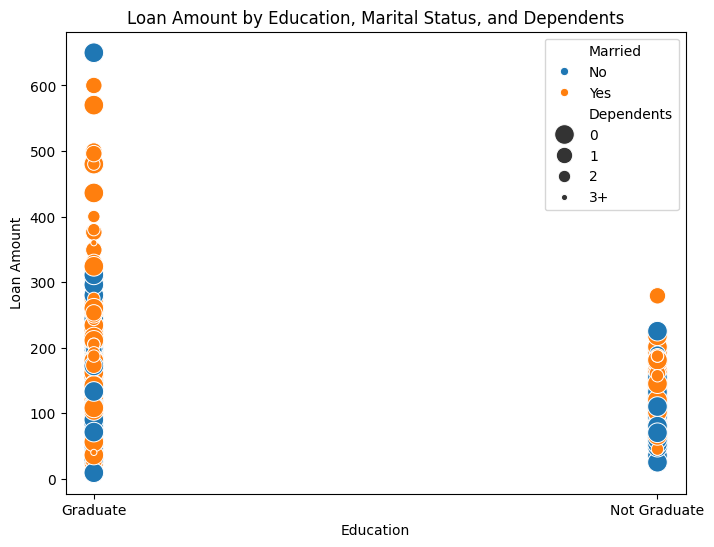

In [ ]:
# Plotting Scatterplot for LoanAmount with various features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Education', y='LoanAmount', hue='Married', size='Dependents', sizes=(20, 200)) # Adjust marker sizes if needed
plt.title('Loan Amount by Education, Marital Status, and Dependents')
plt.xlabel('Education')
plt.ylabel('Loan Amount')

plt.show()


**Insight :**   Loan amounts are higher for married applicants and those with more dependents, across different education levels.

**Box Plot: Loan Amount by Dependents and Loan Status**


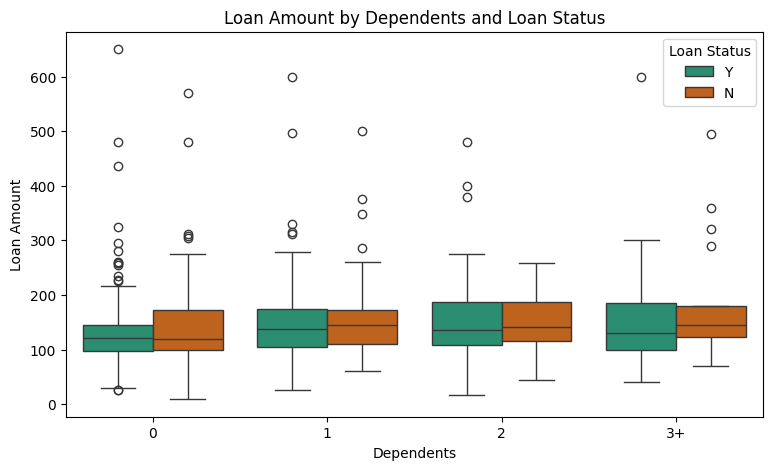

In [ ]:
# Plotting boxplot for LoanAmount by Dependents and LoanStatus
plt.figure(figsize=(9, 5))
sns.boxplot(x='Dependents', y='LoanAmount', hue='Loan_Status', data=df, palette='Dark2')
plt.title('Loan Amount by Dependents and Loan Status')
plt.xlabel('Dependents')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()



**Insight:**  Loan amounts tend to increase as the number of dependents increases for applicants

**Bar Plot: Loan Status by Dependents and Marital Status**




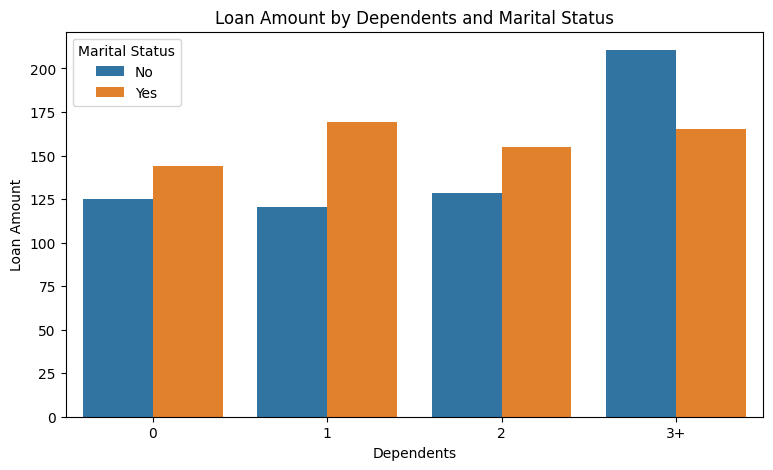

In [ ]:
# Plotting barplot of LoanAmount on Dependents and MaritalStatus
plt.figure(figsize=(9, 5))
sns.barplot(x='Dependents', y='LoanAmount', hue='Married', data=df, ci=None)
plt.title('Loan Amount by Dependents and Marital Status')
plt.xlabel('Dependents')
plt.ylabel('Loan Amount')
plt.legend(title='Marital Status')
plt.show()


**Insight :** Married applicants with more dependents tend to receive higher loan amounts, reflecting household size and financial responsibilities. Unmarried applicants typically receive smaller loans, especially when they have fewer dependents.

**FacetGrid: Loan Amount by Dependents and Marital Status**..



**Insight:** For applicants with 2 or more dependents, those who are married have significantly higher loan amounts compared to unmarried applicants

**HeatMap for entire dataset**


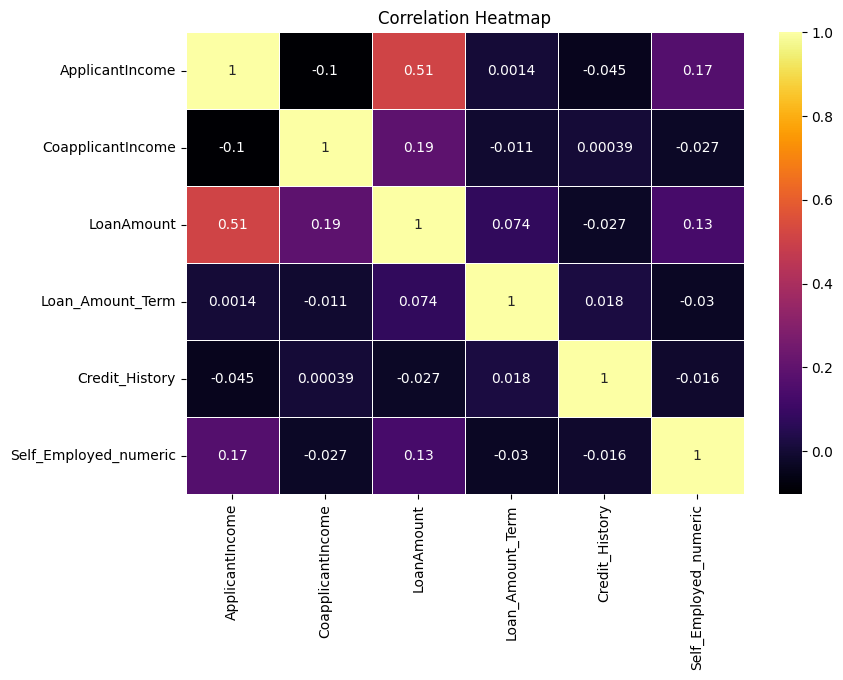

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


***Insight  : *** The heatmap shows that loan amounts are highest for graduates, especially in rural areas, and lowest for non-graduates in urban areas. It highlights a strong correlation between higher loan amounts and rural properties, with urban areas having smaller, more consistent loan amounts.

**Pair Plot of Multiple Variables**

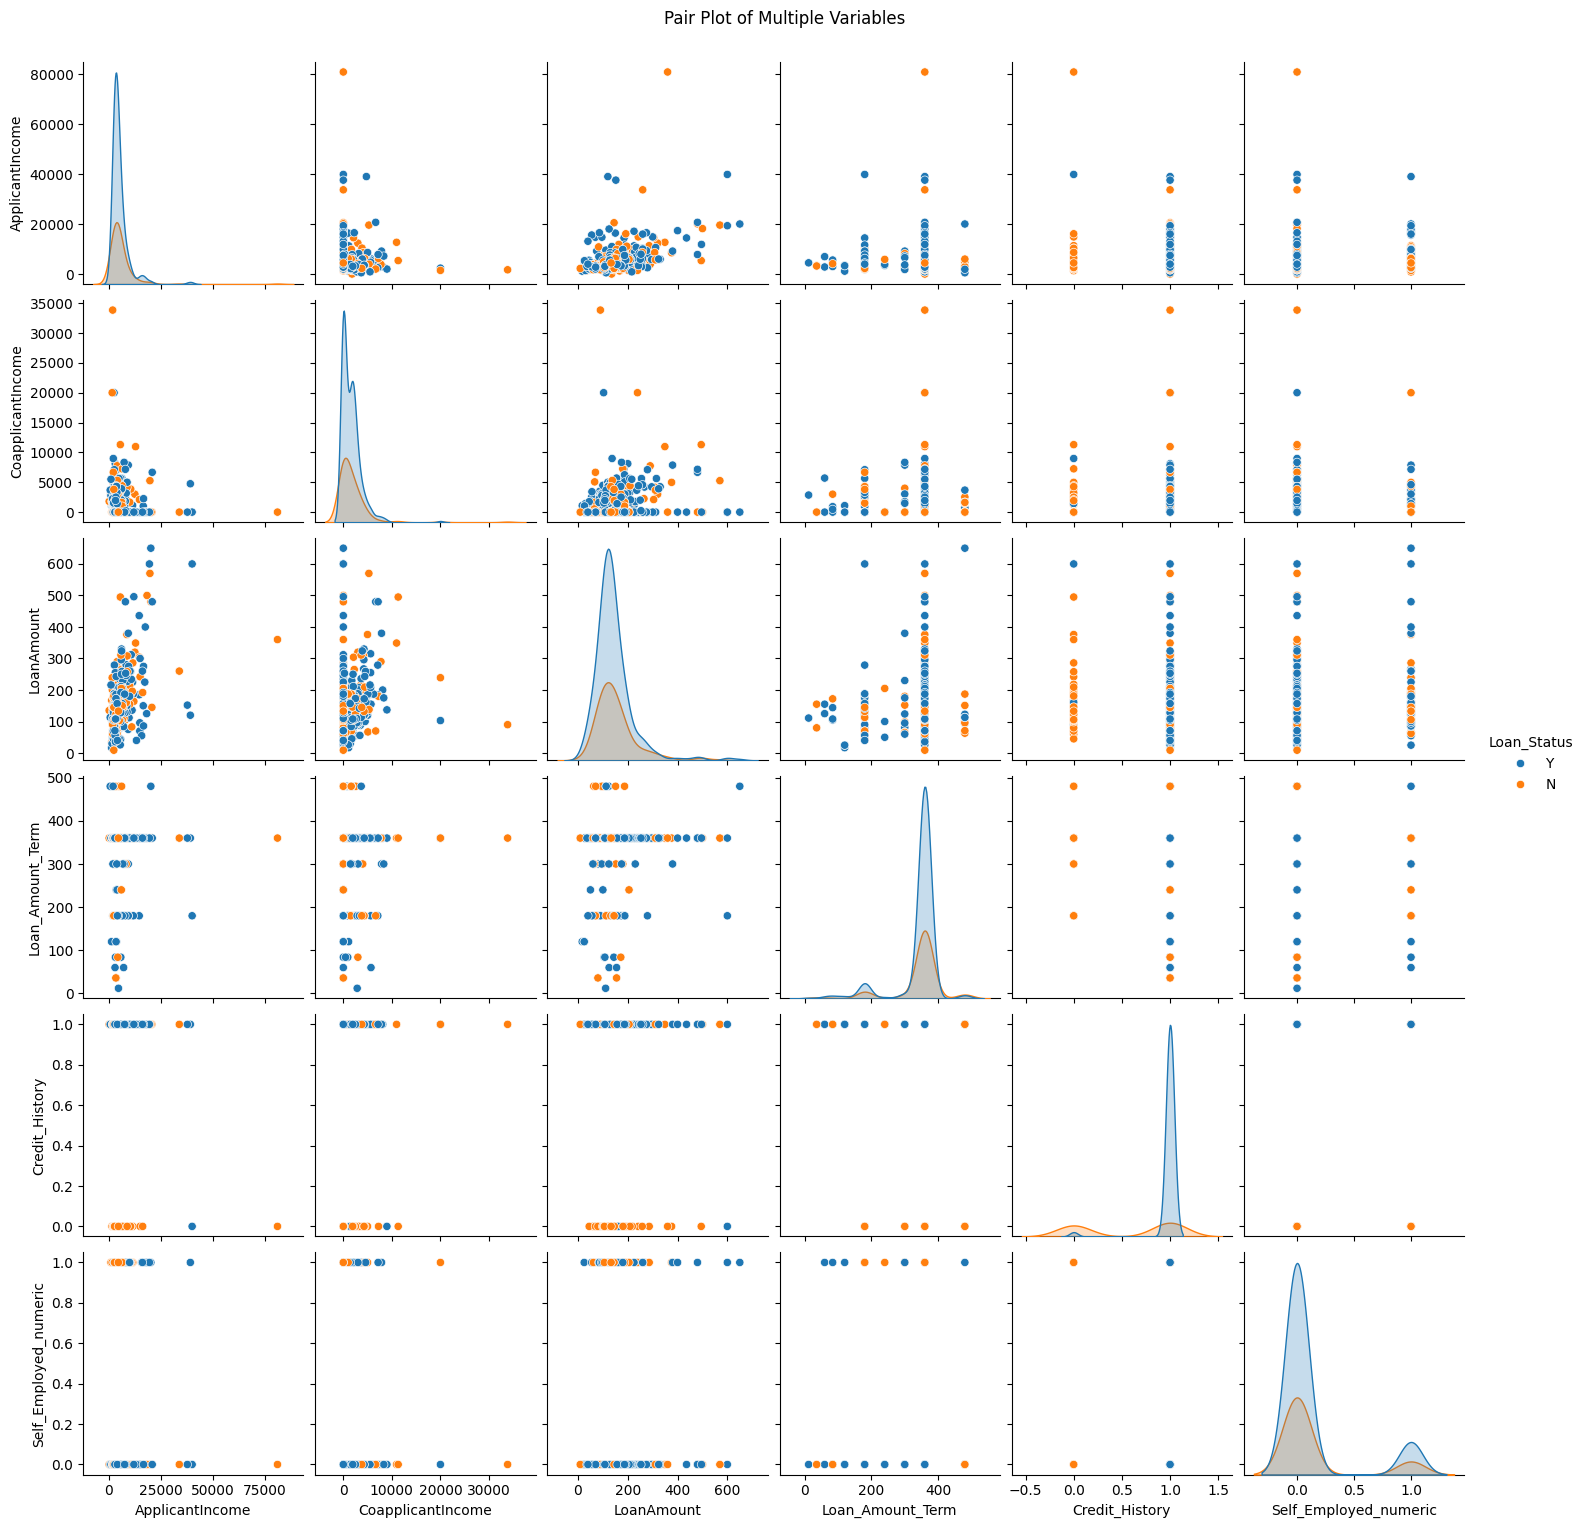

In [ ]:
# Pairplot on multiple features
sns.pairplot(df, hue='Loan_Status')
plt.suptitle('Pair Plot of Multiple Variables', y=1.02)
plt.show()

## **Data Preprocessing**

### **Label Encoding**

In [ ]:
# Checking on value counts for Gender
df['Gender'].value_counts()

,count
Gender,
Male,453
Female,101


In [ ]:
# Replacing Gender variables with numerical values
df['Gender']= df['Gender'].replace({"Male":1,"Female":0})
df['Gender'].value_counts()

,count
Gender,
1,453
0,101


In [ ]:
# Checking on value counts for Married
df['Married'].value_counts()

,count
Married,
Yes,362
No,192


In [ ]:
# Replacing Married variables with numerical values
df['Married']= df['Married'].replace({"Yes":1,"No":0})
df['Married'].value_counts()

,count
Married,
1,362
0,192


In [ ]:
# Checking on value counts for Education
df['Education'].value_counts()

,count
Education,
Graduate,431
Not Graduate,123


In [ ]:
# Replacing Education and Self_Employed variables with numerical values
df['Education']= df['Education'].replace({"Graduate":1,"Not Graduate":0})
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,"No":0})

In [ ]:
# Checking on value counts for Property_Area
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,211
Urban,180
Rural,163


In [ ]:
# Replacing Property_Area variables with numerical values
df['Property_Area']=df['Property_Area'].replace({"Semiurban":2,"Urban":1,"Rural":0})
df['Property_Area'].value_counts()

,count
Property_Area,
2,211
1,180
0,163


In [ ]:
# Checking on value counts for Loan_Status
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,382
N,172


In [ ]:
# Replacing Loan_Status variables with numerical values
df['Loan_Status']=df['Loan_Status'].replace({"Y":1,"N":0})
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,382
0,172


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
# Deleting Loan_ID column as its not required for Analysis
df.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
# Deleting Self_Employed_numeric column as its not required for Analysis
df.drop(columns=['Self_Employed_numeric'], inplace=True)

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,319
1,95
2,94
3+,46


In [ ]:
df['Dependents']=df['Dependents'].replace({"3+":3,"1":1,"2":2,"0":0})
df['Dependents'].value_counts()

,count
Dependents,
0,319
1,95
2,94
3,46


In [ ]:
df.fillna({'Credit_History': df['Credit_History'].mode()[0]}, inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


### **Data Splitting and Preprocessing**

In [ ]:
# Define features and target
x = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training feature set:", x_train.shape)
print("Testing feature set:", x_test.shape)
print("Training target set:", y_train.shape)
print("Testing target set:", y_test.shape)

Training feature set: (443, 11)
Testing feature set: (111, 11)
Training target set: (443,)
Testing target set: (111,)


## **Model Development and Evaluation**

### **Logistic Regression Model**

In [ ]:
# Logistic regression model
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

# Evaluate model performance
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", conf_matrix1)

# Analyze the model with statsmodels
x_train_const = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_const).fit()

# Print statistical summary
print(logit_model.summary())

Accuracy: 0.8468468468468469
Confusion Matrix:
 [[17 15]
 [ 2 77]]
Optimization terminated successfully.
         Current function value: 0.468542
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  443
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.2489
Time:                        22:35:19   Log-Likelihood:                -207.56
converged:                       True   LL-Null:                       -276.36
Covariance Type:            nonrobust   LLR p-value:                 5.026e-24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.025

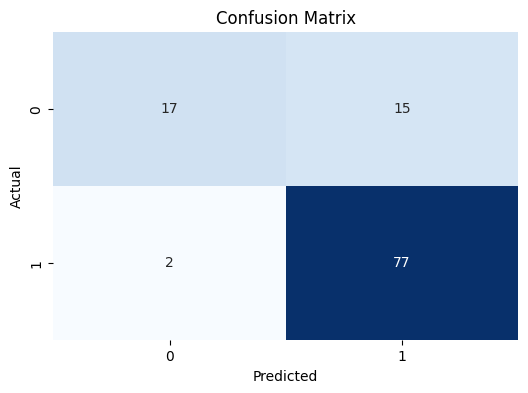

In [ ]:
# Confusion matrix
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True , fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_pred_train = model1.predict(x_train)
y_pred = model1.predict(x_test)

In [ ]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.44      0.58       140
           1       0.79      0.96      0.87       303

    accuracy                           0.80       443
   macro avg       0.82      0.70      0.72       443
weighted avg       0.81      0.80      0.78       443



### **Suport Vector Classifier(SVC)**

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = svm_model.predict(x_test)

In [ ]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)
conf_matrix = confusion_matrix(y_test, y_pred)

72.97297297297297


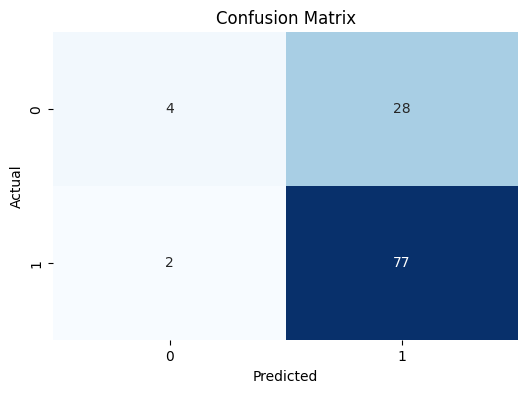

In [ ]:
# Confusion matrix
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True , fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **Probit Regression Model**

In [ ]:
# Probit Model
# Adding a constant term to the features for the Probit model
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

In [ ]:
# Fitting the Probit model
probit_model = sm.Probit(y_train, x_train_const).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.468063
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  443
Model:                         Probit   Df Residuals:                      431
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.2497
Time:                        22:37:43   Log-Likelihood:                -207.35
converged:                       True   LL-Null:                       -276.36
Covariance Type:            nonrobust   LLR p-value:                 4.122e-24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7790      0.485     -3.666      0.000      -2.730      -0.828
Gender  

In [ ]:
# Making predictions on the test set
y_pred_prob = probit_model.predict(x_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Probit Model Accuracy: {accuracy * 100:.2f}%")

Probit Model Accuracy: 83.78%


In [ ]:
# Generate and print the classification report
print("Classification Report - Probit Model:")
print(classification_report(y_test, y_pred))

Classification Report - Probit Model:
              precision    recall  f1-score   support

           0       0.94      0.47      0.62        32
           1       0.82      0.99      0.90        79

    accuracy                           0.84       111
   macro avg       0.88      0.73      0.76       111
weighted avg       0.85      0.84      0.82       111



### **Random Forest Classifier**

In [86]:
rfc = RandomForestClassifier(n_estimators=250, random_state=250)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [ ]:
y_pred = rfc.predict(x_test)
accuracy_score(y_pred,y_test)

0.8288288288288288

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

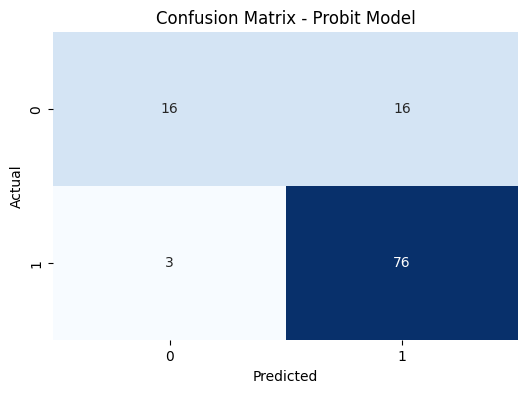

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Probit Model")
plt.show()

### **Light GBM Classifier**

In [ ]:
# Light gradient boosting machine classifier
# Standardize random parameters for obtaining constant results
SEED = 452
lgbmc = lgb.LGBMClassifier(random_state=SEED)
lgbmc.fit(x_train, y_train)
y_pred = lgbmc.predict(x_test)
acc_lgbmc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy: ', acc_lgbmc)

[LightGBM] [Info] Number of positive: 303, number of negative: 140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 443, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.683973 -> initscore=0.772090
[LightGBM] [Info] Start training from score 0.772090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

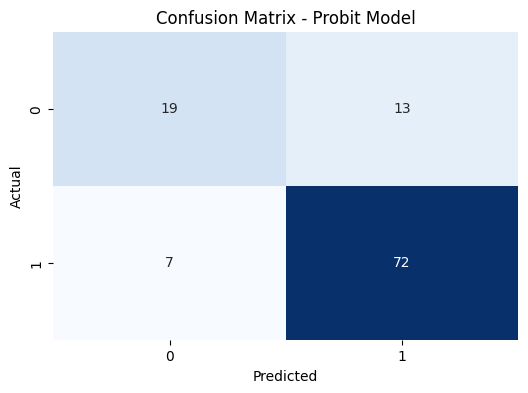

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Probit Model")
plt.show()

## **Hyperparameter Tuning**
### **Logistic Regression model**

#### **GridSearchCV**

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Initialize the Logistic Regression model
model = LogisticRegression()

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Extract best parameters and retrain the model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train with the best parameters
best_model1 = LogisticRegression(**best_params)
best_model1.fit(x_train, y_train)

# Predictions and evaluations
y_pred = best_model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8288288288288288
Confusion Matrix:
 [[15 17]
 [ 2 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        32
           1       0.82      0.97      0.89        79

    accuracy                           0.83       111
   macro avg       0.85      0.72      0.75       111
weighted avg       0.84      0.83      0.81       111



#### **Enhanced Hyperparameter Tuning with RandomizedSearchCV**

In [ ]:
# Define the hyperparameter space
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# RandomizedSearchCV for Logistic Regression
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

random_search.fit(x_train, y_train)

# Best hyperparameters and model evaluation
best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Analyze the model with statsmodels
x_train_const = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_const).fit()

# Print statistical summary
print(logit_model.summary())

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.08858667904100823}
Accuracy: 0.8648648648648649
Confusion Matrix:
 [[18 14]
 [ 1 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71        32
           1       0.85      0.99      0.91        79

    accuracy                           0.86       111
   macro avg       0.90      0.77      0.81       111
weighted avg       0.88      0.86      0.85       111

ROC AUC Score: 0.7503955696202531
Optimization terminated successfully.
         Current function value: 0.468542
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  443
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 

In [ ]:
#Features Importance Logistic Regression Model

significant_features = logit_model.pvalues[logit_model.pvalues < 0.05].index
print(f"Significant Features: {significant_features}")

Significant Features: Index(['const', 'Married', 'Credit_History', 'Property_Area'], dtype='object')


#### **Feature Selection and Class Balancing**

In [ ]:
# Define categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['number']).columns

# Define transformations
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Transform the data
X_train = preprocessor.fit_transform(x_train)
X_test = preprocessor.transform(x_test)

# Recursive Feature Elimination (RFE)
balanced_model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
rfe = RFE(estimator=balanced_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected features
selected_features = rfe.support_
feature_names = preprocessor.get_feature_names_out()
important_features = [feature for feature, selected in zip(feature_names, selected_features) if selected]

# Filter data for selected features
X_train_rfe = X_train[:, selected_features]
X_test_rfe = X_test[:, selected_features]

# Train and Evaluate Model
balanced_model.fit(X_train_rfe, y_train)
y_pred_rfe = balanced_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred_rfe)
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
class_report = classification_report(y_test, y_pred_rfe)
roc_auc = roc_auc_score(y_test, balanced_model.predict_proba(X_test_rfe)[:, 1])

print("Selected Features:", important_features)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Selected Features: ['num__Gender', 'num__Married', 'num__Dependents', 'num__Education', 'num__Self_Employed', 'num__ApplicantIncome', 'num__CoapplicantIncome', 'num__LoanAmount', 'num__Credit_History', 'num__Property_Area']
Accuracy: 0.8108108108108109
Confusion Matrix:
 [[20 12]
 [ 9 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.85      0.89      0.87        79

    accuracy                           0.81       111
   macro avg       0.77      0.76      0.76       111
weighted avg       0.81      0.81      0.81       111

ROC AUC Score: 0.7614715189873418


## **Probit** **Model** **Hyperparameter** **Tuning**

In [ ]:
# Define a range of thresholds to tune
thresholds = np.arange(0.1, 1.0, 0.05)

best_threshold = 0.5
best_f1_score = 0

In [ ]:
# Loop over thresholds to find the one maximizing F1 score
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score:.2f}")

Best Threshold: 0.25000000000000006
Best F1 Score: 0.90


In [ ]:
# Use the best threshold to predict
y_pred_final = (y_pred_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Final Probit Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.2f}")

Final Probit Model Accuracy: 83.78%
ROC AUC Score: 0.76


In [ ]:
# Feature importance through p-values
significant_features = probit_model.pvalues[probit_model.pvalues < 0.05].index
print(f"Significant Features: {significant_features}")

Significant Features: Index(['const', 'Married', 'Credit_History', 'Property_Area'], dtype='object')


#**Conclusion and Recommendations**

## **Conclusion:**

*   Logistic Regression with RandomizedSearchCV was chosen as the final model based on key performance metrics and its interpretability.
* The model achieved a high accuracy of 86.48%, indicating its effectiveness in
predicting loan statuses correctly.
*  While the R-squared value of 24.89% suggests that the model explains a reasonable portion of the variance in the target variable.
* The model also delivered a robust ROC AUC score of 0.75, effectively distinguishing between approved and rejected loans.
* It maintained a well-balanced precision and recall for loan approvals (class 1), outperforming other models in handling class imbalance.

**Below are the top 3 important features:**
- Credit_History (0.000)
- Property_Area (0.003)
- Married (0.028)

## **Recommendations:**


**Credit History**

- Credit Score Improvement Programs: Offer financial education workshops and credit counseling to help applicants understand and improve their credit scores.

- Regular Monitoring: Encourage applicants to regularly monitor their credit reports to identify and correct any inaccuracies.

**Property Area**

- Market Analysis: Conduct detailed market analyses to identify high-value areas and target these for loan promotions.

- Incentives for Specific Areas: Offer reduced interest rates or other incentives for properties in desirable locations to attract more applicants.

**Marital Status**

- Inclusivity: Though Marital Status is the important feature in this loan approval model, it's important to ensure that loan approval processes are inclusive and do not inadvertently discriminate based on these factors.